<a href="https://colab.research.google.com/github/bnespi/Data-Science-Shits/blob/main/Sparta3_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import metrics
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names']).rename(columns={'sepal length (cm)':'sepal_length', 'sepal width (cm)':'sepal_width', 
                                                                                    'petal length (cm)':'petal_length','petal width (cm)':'petal_width'})
iris_targets = pd.DataFrame(iris['target'], columns=['target'])
iris_full = pd.concat([iris_df, iris_targets])

<Figure size 360x360 with 0 Axes>

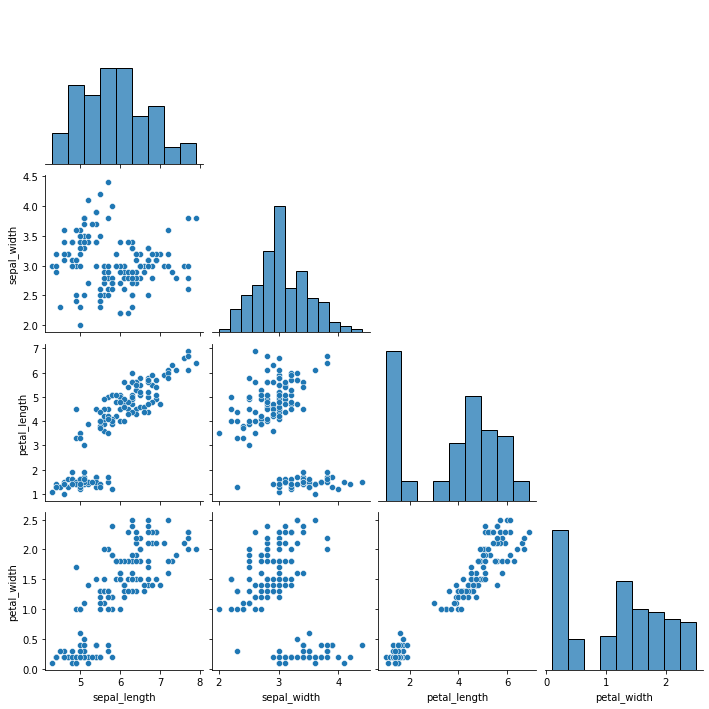

In [ ]:
plt.figure(figsize=(5,5));
sns.pairplot(iris_df, corner=True);

Correct Clustering

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(2)

iris_transform = pca.fit_transform(iris_df)

In [ ]:
iris_transform.shape

(150, 2)

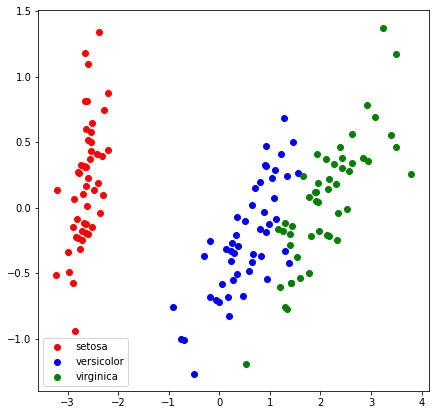

In [ ]:
correct = plt.figure(figsize=(7,7));

plt.scatter(iris_transform[iris_targets.target==0, 0], iris_transform[iris_targets.target==0, 1], c='red');
plt.scatter(iris_transform[iris_targets.target==1, 0], iris_transform[iris_targets.target==1, 1], c='blue');
plt.scatter(iris_transform[iris_targets.target==2, 0], iris_transform[iris_targets.target==2, 1], c='green');

plt.legend(list(iris['target_names']));

#KMeans


##Find optimal k for KMeans

###Grid Search

In [ ]:
for n in range(1, 10):
  for algo in ["auto", "full", "elkan"]:
    kmeans = KMeans(n_clusters=n, algorithm = algo).fit(iris_df)

    iris_pred = kmeans.fit_predict(iris_df)

    print("n={}, algorithm={}\taccuracy={}".format(n, algo, metrics.accuracy_score(iris_targets, iris_pred)))
  print()

n=1, algorithm=auto	accuracy=0.3333333333333333
n=1, algorithm=full	accuracy=0.3333333333333333
n=1, algorithm=elkan	accuracy=0.3333333333333333

n=2, algorithm=auto	accuracy=0.6466666666666666
n=2, algorithm=full	accuracy=0.6466666666666666
n=2, algorithm=elkan	accuracy=0.02



/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:968: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  RuntimeWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:968: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  RuntimeWarning,


n=3, algorithm=auto	accuracy=0.8933333333333333
n=3, algorithm=full	accuracy=0.44
n=3, algorithm=elkan	accuracy=0.8933333333333333

n=4, algorithm=auto	accuracy=0.11333333333333333
n=4, algorithm=full	accuracy=0.7
n=4, algorithm=elkan	accuracy=0.7266666666666667

n=5, algorithm=auto	accuracy=0.16
n=5, algorithm=full	accuracy=0.58
n=5, algorithm=elkan	accuracy=0.08

n=6, algorithm=auto	accuracy=0.19333333333333333
n=6, algorithm=full	accuracy=0.08
n=6, algorithm=elkan	accuracy=0.08

n=7, algorithm=auto	accuracy=0.24
n=7, algorithm=full	accuracy=0.006666666666666667
n=7, algorithm=elkan	accuracy=0.006666666666666667

n=8, algorithm=auto	accuracy=0.0
n=8, algorithm=full	accuracy=0.15333333333333332
n=8, algorithm=elkan	accuracy=0.35333333333333333

n=9, algorithm=auto	accuracy=0.16
n=9, algorithm=full	accuracy=0.23333333333333334
n=9, algorithm=elkan	accuracy=0.1



###Elbow Method

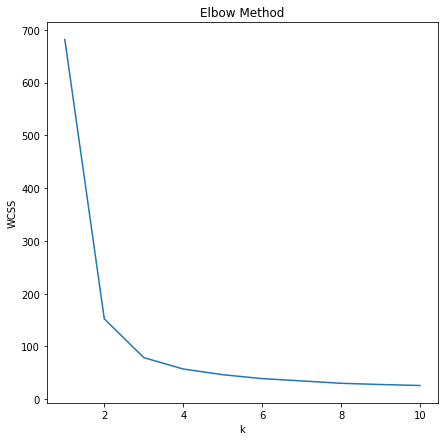

In [ ]:
wcss = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(iris_df)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(7,7));

plt.plot(range(1,11), wcss);
plt.title("Elbow Method");
plt.xlabel('k');
plt.ylabel('WCSS');

##K=3

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(iris_df)

labels_km = kmeans.labels_

KMeans Output

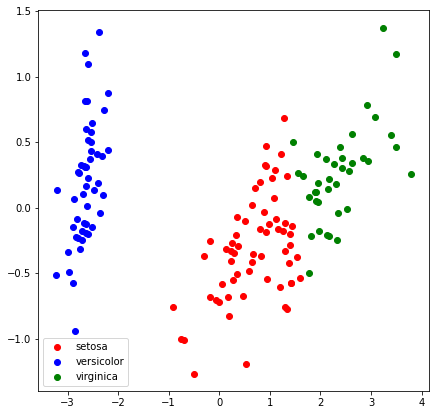

In [ ]:
kmeans_plot = plt.figure(figsize=(7,7));

plt.scatter(iris_transform[labels_km==0, 0], iris_transform[labels_km==0, 1], c='red');
plt.scatter(iris_transform[labels_km==1, 0], iris_transform[labels_km==1, 1], c='blue');
plt.scatter(iris_transform[labels_km==2, 0], iris_transform[labels_km==2, 1], c='green');

plt.legend(list(iris['target_names']));

#DBSCAN

In [ ]:
db = DBSCAN()

db.fit(iris_df)

db.labels_


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
labels_db = db.labels_+1

labels_db

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

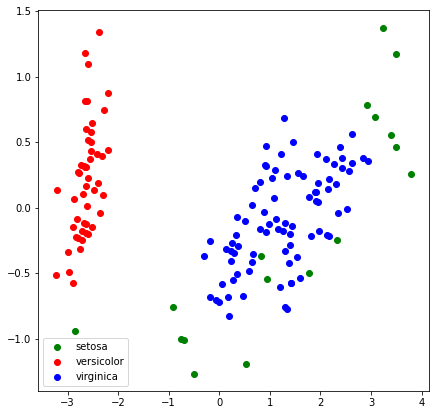

In [ ]:
dbscan_plot = plt.figure(figsize=(7,7));

# plt.scatter(iris_transform[labels_db==0, 0], iris_transform[labels_db==0, 1], c='red');
# plt.scatter(iris_transform[labels_db==1, 0], iris_transform[labels_db==1, 1], c='blue');
# plt.scatter(iris_transform[labels_db==2, 0], iris_transform[labels_db==2, 1], c='green');

plt.scatter(iris_transform[labels_db==0, 0], iris_transform[labels_db==0, 1], c='green');
plt.scatter(iris_transform[labels_db==1, 0], iris_transform[labels_db==1, 1], c='red');
plt.scatter(iris_transform[labels_db==2, 0], iris_transform[labels_db==2, 1], c='blue');

plt.legend(list(iris['target_names']));

#Hierarchical Clustering

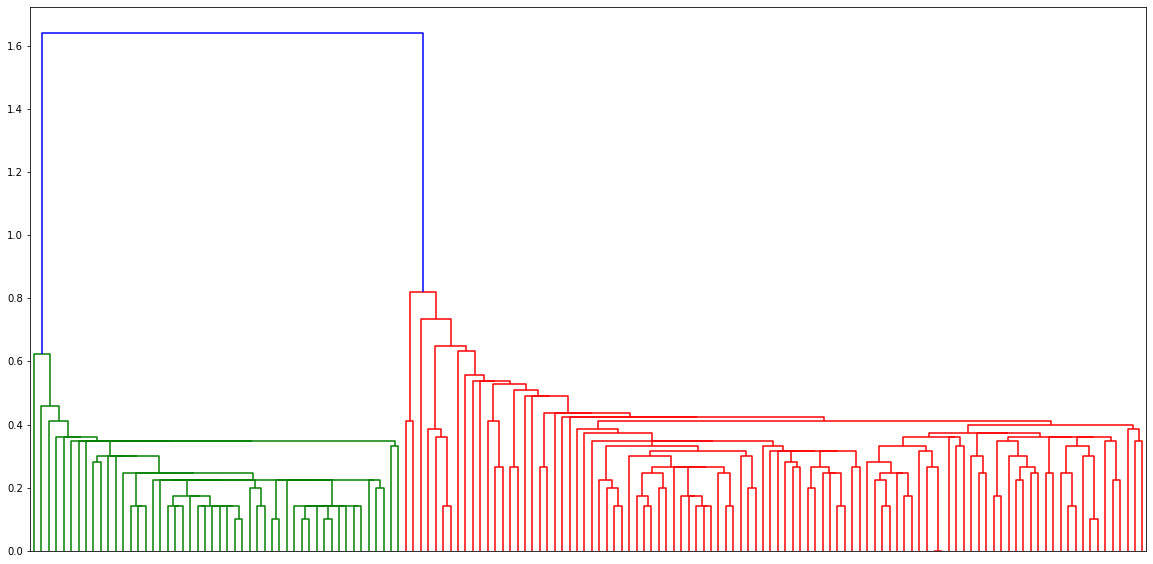

In [ ]:
link = linkage(iris_df, 'single')

plt.figure(figsize=(20,10));

dendrogram(link, orientation='top', distance_sort='descending', show_leaf_counts=True)

plt.xticks([]);
plt.show();

From the graph, it seems that there are two clusters formed at first. But, as we go forward the red cluster, a wider distance between two points is shown and I think it's safe to assume that the red cluster is divided into two clusters again. Making the classification have 3 clusters.

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

labels_h = cluster.fit_predict(iris_df)

labels_h

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

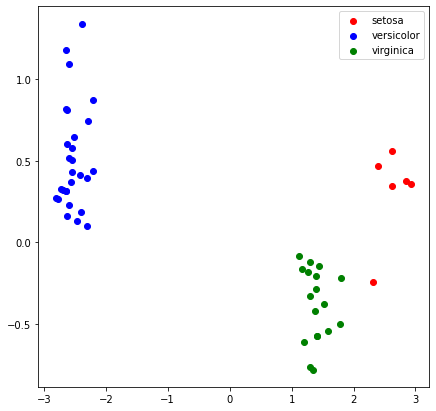

In [ ]:
plt.figure(figsize=(7,7));

plt.scatter(iris_transform[iris_pred==0, 0], iris_transform[iris_pred==0, 1], c='red');
plt.scatter(iris_transform[iris_pred==1, 0], iris_transform[iris_pred==1, 1], c='blue');
plt.scatter(iris_transform[iris_pred==2, 0], iris_transform[iris_pred==2, 1], c='green');

plt.legend(list(iris['target_names']));

In [ ]:
def transform_swap(iterable_1):
  iterable=iterable_1.copy()
  for x in range(0, iterable.shape[0]-1):
    # print(iterable[x], end=' ')
    if iterable[x]==0:
      iterable[x]=1
    elif iterable[x]==1:
      iterable[x]=0
    else:
      continue
    # print(iterable[x])
  # print()
  return iterable

def transform_db(iterable_1):
  iterable=iterable_1.copy()
  for x in range(0, iterable.shape[0]-1):
    # print(iterable[x], end=' ')
    if iterable[x]==2:
      iterable[x]=1
    elif iterable[x]==1:
      iterable[x]=2
    else:
      continue
    # print(iterable[x])
  # print()
  return iterable

After working with the data that the models created, I realized that the clustering labels are different and can be improved upon.

The 0's on the original data were labeled as 1's and the 1's are labeled 0's.

I saw this as the model seeing the 1's and 0's differently and clustering them in different groups but the naming convention made the labeling wrong. 

So, I swapped the 0's and 1's to better look at the clustering and how it fairs when compared to the real clustering.

In [ ]:
labels_db

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
km_labels = transform_swap(labels_km)
db_labels = transform_db(transform_swap(labels_db))
h_labels =  transform_swap(labels_h)

#Comparing Each Plots

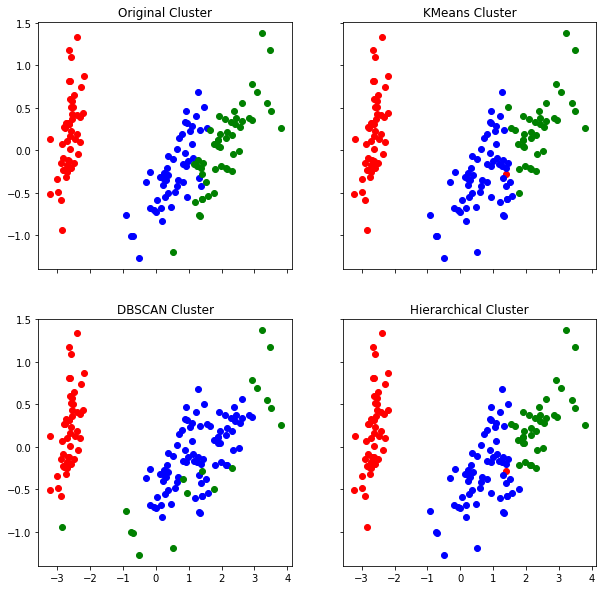

In [ ]:
# plt.figure(figsize=(15,15));
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True);

fig.set_figheight(10);
fig.set_figwidth(10);

ax[0,0].scatter(iris_transform[iris_targets.target==0, 0], iris_transform[iris_targets.target==0, 1], c='red');
ax[0,0].scatter(iris_transform[iris_targets.target==1, 0], iris_transform[iris_targets.target==1, 1], c='blue');
ax[0,0].scatter(iris_transform[iris_targets.target==2, 0], iris_transform[iris_targets.target==2, 1], c='green');
ax[0,0].set_title('Original Cluster');

ax[0,1].scatter(iris_transform[km_labels==0, 0], iris_transform[km_labels==0, 1], c='red');
ax[0,1].scatter(iris_transform[km_labels==1, 0], iris_transform[km_labels==1, 1], c='blue');
ax[0,1].scatter(iris_transform[km_labels==2, 0], iris_transform[km_labels==2, 1], c='green');
ax[0,1].set_title('KMeans Cluster');


ax[1,0].scatter(iris_transform[db_labels==0, 0], iris_transform[db_labels==0, 1], c='red');
ax[1,0].scatter(iris_transform[db_labels==1, 0], iris_transform[db_labels==1, 1], c='blue');
ax[1,0].scatter(iris_transform[db_labels==2, 0], iris_transform[db_labels==2, 1], c='green');
ax[1,0].set_title('DBSCAN Cluster');

ax[1,1].scatter(iris_transform[h_labels==0, 0], iris_transform[h_labels==0, 1], c='red');
ax[1,1].scatter(iris_transform[h_labels==1, 0], iris_transform[h_labels==1, 1], c='blue');
ax[1,1].scatter(iris_transform[h_labels==2, 0], iris_transform[h_labels==2, 1], c='green');
ax[1,1].set_title('Hierarchical Cluster');

###Cross Tab

####KMeans Cross Tab

In [ ]:
pd.crosstab(iris_targets.target, km_labels)

col_0,0,1,2
target,,,
0,50,0,0
1,0,48,2
2,1,13,36


####DBSCAN Cross Tab

In [ ]:
pd.crosstab(iris_targets['target'], db_labels)

col_0,0,1,2
target,,,
0,49,0,1
1,0,44,6
2,0,39,11


####Hierarchical Cross Tab

In [ ]:
pd.crosstab(iris_targets.target, h_labels)

col_0,0,1,2
target,,,
0,50,0,0
1,0,49,1
2,1,14,35
